In [1]:
# Import the required libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=(10,6)
sns.set_style('darkgrid')

In [3]:
# Load the "tips" dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv', parse_dates=['Date'])

# Exploration

In [4]:
# Display the first few rows of the dataset.
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Display the last few rows of the dataset.
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
# Get the # of rows and columns
df.shape

(1000, 17)

In [7]:
# Get the columns name 
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
# Get information about the data types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [9]:
# Check null values
df.isnull().sum() 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
# Summary statistics.
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.67,26.49,10.08,32.88,55.23,77.94,99.96
Quantity,1000.0,5.51,2.92,1.00,3.00,5.00,8.00,10.00
Tax 5%,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Total,1000.0,322.97,245.89,10.68,124.42,253.85,471.35,1042.65
cogs,1000.0,307.59,234.18,10.17,118.50,241.76,448.90,993.00
gross margin percentage,1000.0,4.76,0.00,4.76,4.76,4.76,4.76,4.76
gross income,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Rating,1000.0,6.97,1.72,4.00,5.50,7.00,8.50,10.00


In [11]:
# Total Sales
total_sales = df['Total'].sum()
print("Total Sales:", total_sales)

Total Sales: 322966.749


In [12]:
# COGS (Cost of Goods Sold)
cogs = df['cogs'].sum()
print("Cost of Goods Sold (COGS):", cogs)

Cost of Goods Sold (COGS): 307587.38


In [13]:
# Gross Income 
gross_income =df['gross income'].sum().round(2)
print("Gross Income:", gross_income)

Gross Income: 15379.37


In [14]:
# Total Quantity Sold
total_quantity = df['Quantity'].sum()
print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 5510


In [15]:
# Gross Margin 
gross_margin =df['gross margin percentage'].mean().round(2)
print("Gross Margin (%):", gross_margin)

Gross Margin (%): 4.76


In [16]:
# Average Rating
average_rating = df['Rating'].mean()
print("Average Rating:", average_rating)

Average Rating: 6.9727


# Visualization

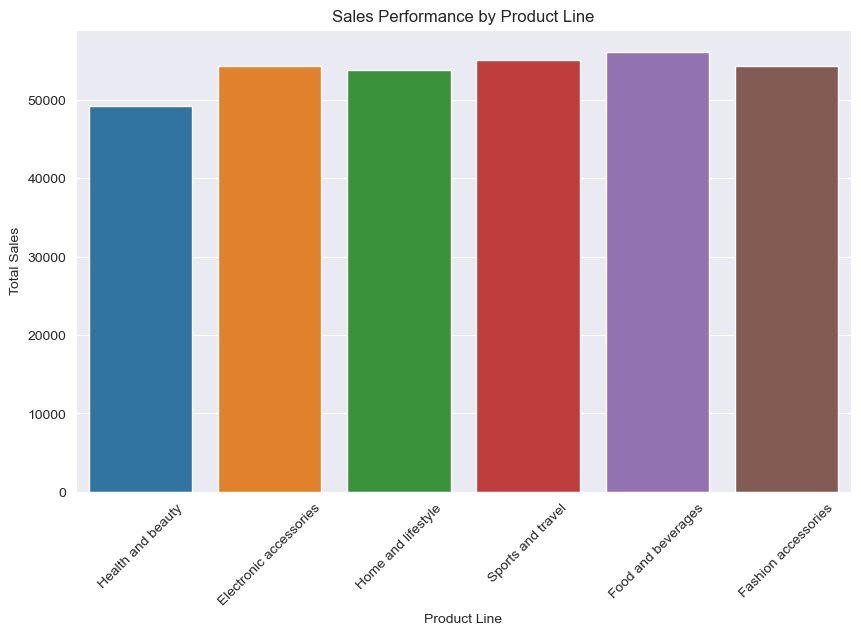

In [17]:
# Sales Performance by Product Line
sns.barplot(data=df, x='Product line', y='Total', errorbar=None, estimator=sum)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Product Line')
plt.xticks(rotation=45)
plt.show()

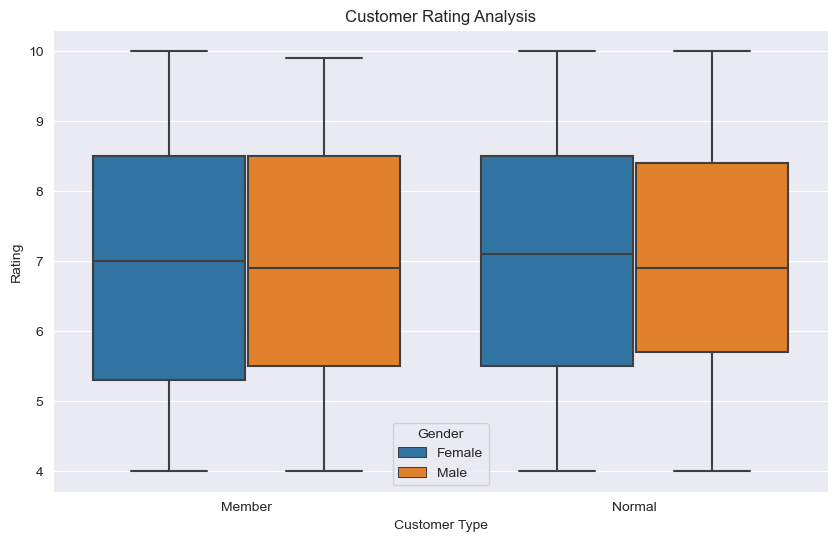

In [18]:
# Customer Rating Analysis
sns.boxplot(x='Customer type', y='Rating', hue='Gender', data=df)
plt.xlabel('Customer Type')
plt.ylabel('Rating')
plt.title('Customer Rating Analysis')
plt.show()

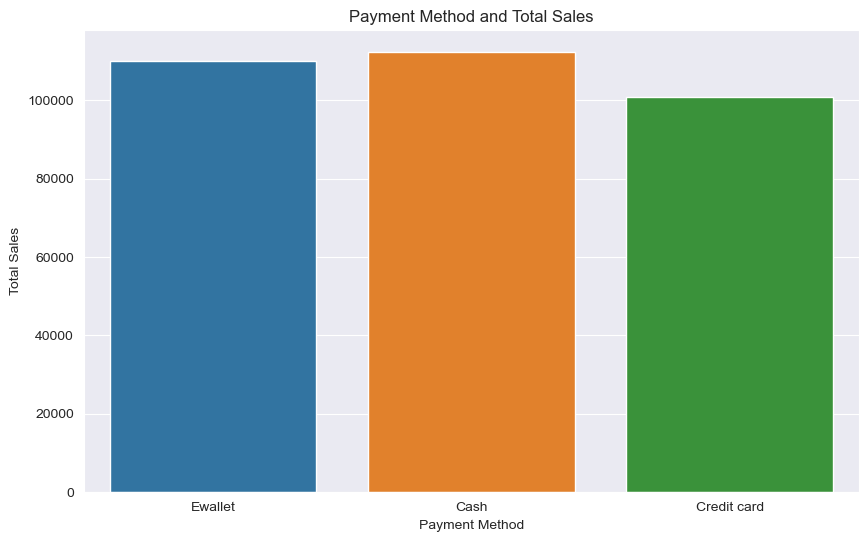

In [19]:
# Payment Method and Total Sales
sns.barplot(x='Payment', y='Total', data=df, estimator=sum, errorbar=None)
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.title('Payment Method and Total Sales')
plt.show()

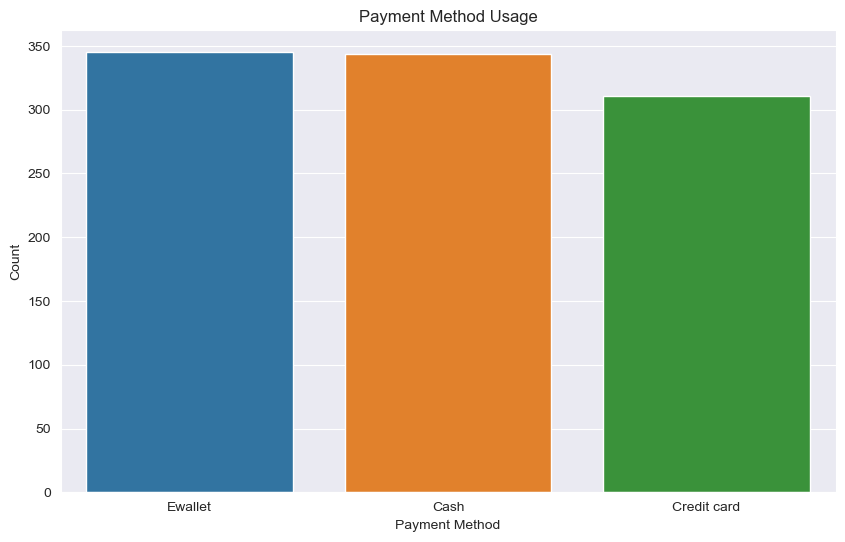

In [20]:
# Payment Method Usage
sns.countplot(x='Payment', data=df)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Usage')
plt.show()

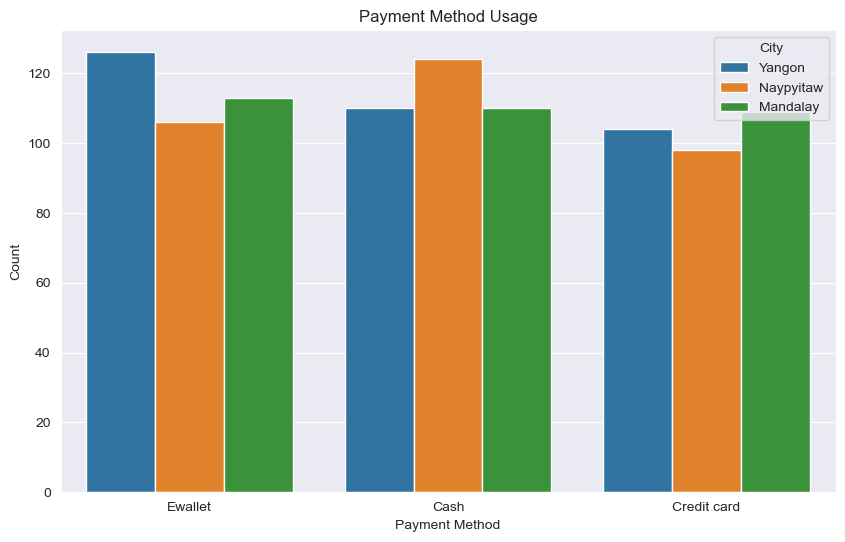

In [21]:
# Payment Method Usage
sns.countplot(x='Payment', data=df, hue='City')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Usage')
plt.show()

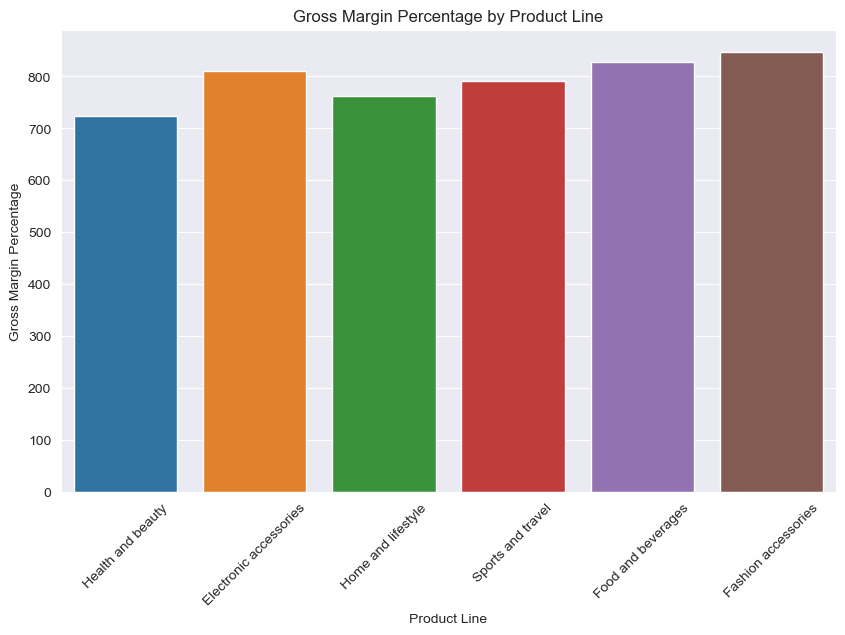

In [22]:

sns.barplot(x='Product line', y='gross margin percentage', estimator=sum,data=df)
plt.xlabel('Product Line')
plt.ylabel('Gross Margin Percentage')
plt.title('Gross Margin Percentage by Product Line')
plt.xticks(rotation=45)
plt.show()

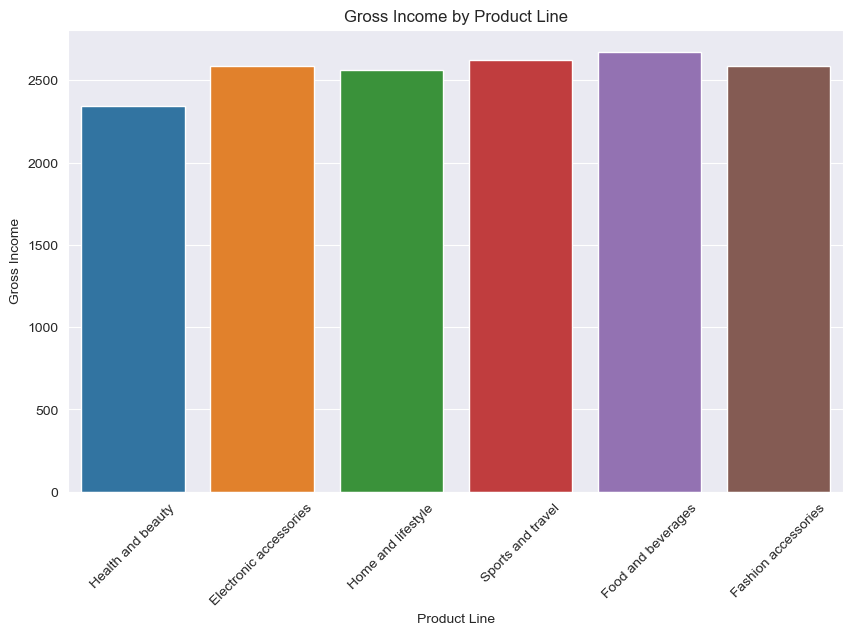

In [23]:
sns.barplot(x='Product line', y='gross income', data=df, estimator=sum, errorbar=None)
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.title('Gross Income by Product Line')
plt.xticks(rotation=45)
plt.show()

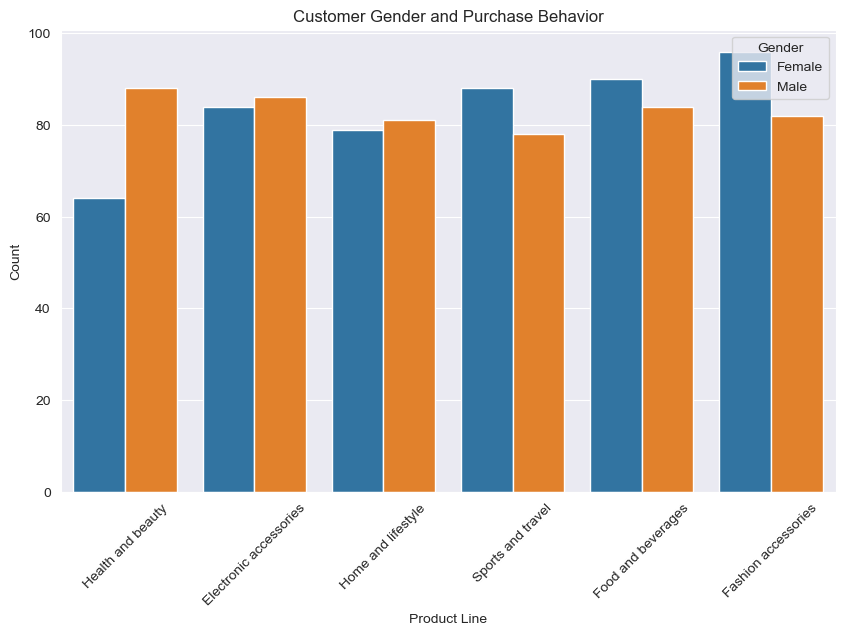

In [24]:
sns.countplot(x='Product line', data=df, hue='Gender')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Customer Gender and Purchase Behavior')
plt.xticks(rotation=45)
plt.show()

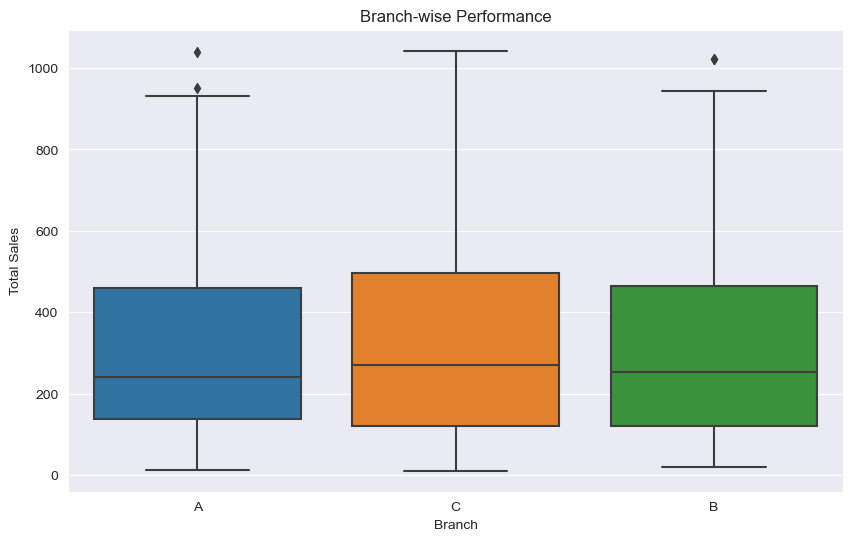

In [25]:
# Branch-wise Performance
sns.boxplot(x='Branch', y='Total', data=df)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Branch-wise Performance')
plt.show()

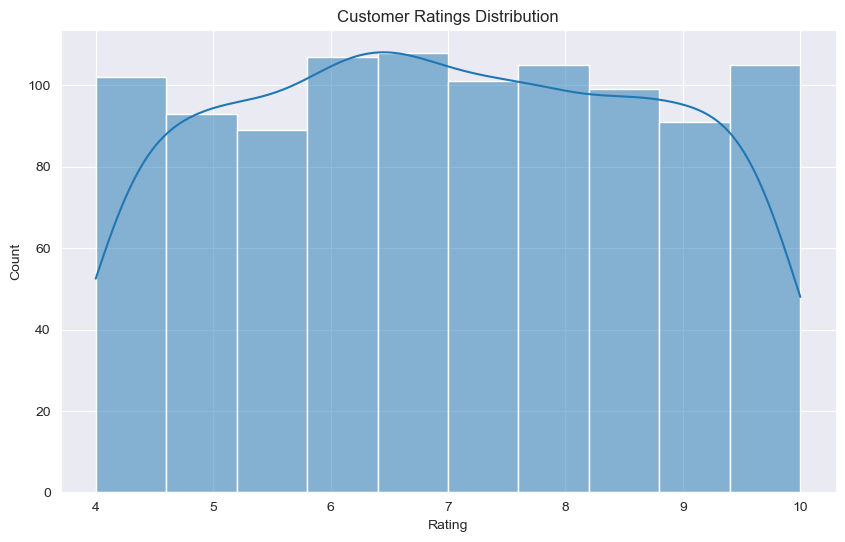

In [26]:
# Customer Ratings Distribution
sns.histplot(df['Rating'], bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Customer Ratings Distribution')
plt.show()

In [27]:
# The average rating for each product
product_rating = df.groupby('Product line')['Rating'].mean().reset_index().sort_values('Rating',ascending=False)
product_rating

,Product line,Rating
2,Food and beverages,7.113218
1,Fashion accessories,7.029213
3,Health and beauty,7.003289
0,Electronic accessories,6.924706
5,Sports and travel,6.916265
4,Home and lifestyle,6.837500


+ Product with the highest rating is **Food and beverages**

In [28]:
# The average rating for each city
city_rating = df.groupby('City')['Rating'].mean().reset_index().sort_values('Rating',ascending=False)
city_rating

,City,Rating
1,Naypyitaw,7.072866
2,Yangon,7.027059
0,Mandalay,6.818072


+ City with the highest rating is **Naypyitaw**

In [29]:
# The average rating for each branch
branch_rating = df.groupby('Branch')['Rating'].mean().reset_index().sort_values('Rating',ascending=False)
branch_rating

,Branch,Rating
2,C,7.072866
0,A,7.027059
1,B,6.818072


+ Branch with the highest rating is **C** 

In [30]:
# The average rating for each customer type
customer_type_rating = df.groupby('Customer type')['Rating'].mean().reset_index().sort_values('Rating',ascending=False)
customer_type_rating

,Customer type,Rating
1,Normal,7.005210
0,Member,6.940319


+ Customer type with the highest rating is **Normal**

A    340
B    332
C    328
Name: Branch, dtype: int64


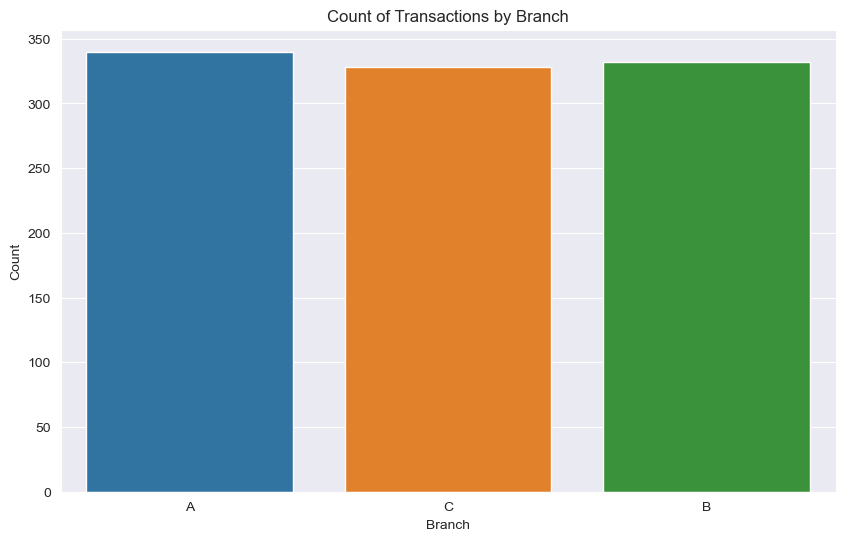

In [31]:
# Count plot for "Branch"
sns.countplot(x='Branch', data=df)
plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Count of Transactions by Branch')

print(df['Branch'].value_counts())

plt.show()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


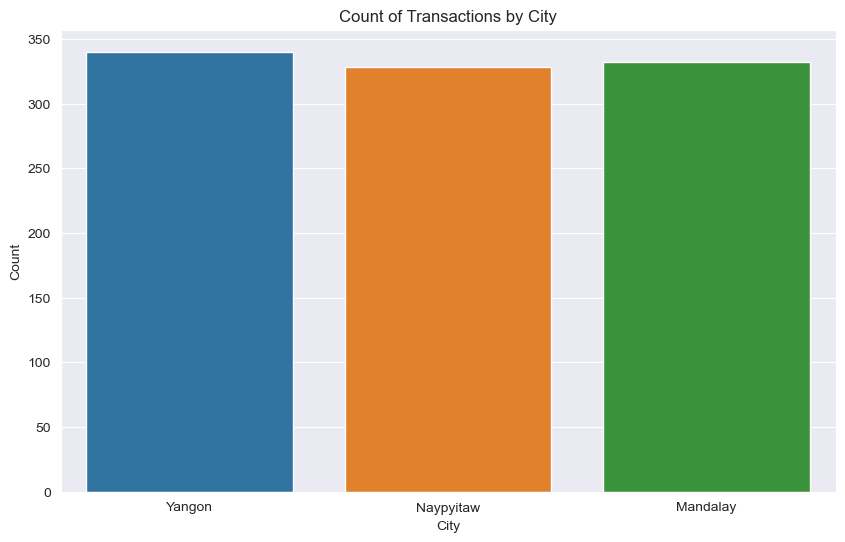

In [32]:
# Count plot for "City"
sns.countplot(x='City', data=df)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Transactions by City')

print(df['City'].value_counts())

plt.show()

Member    501
Normal    499
Name: Customer type, dtype: int64


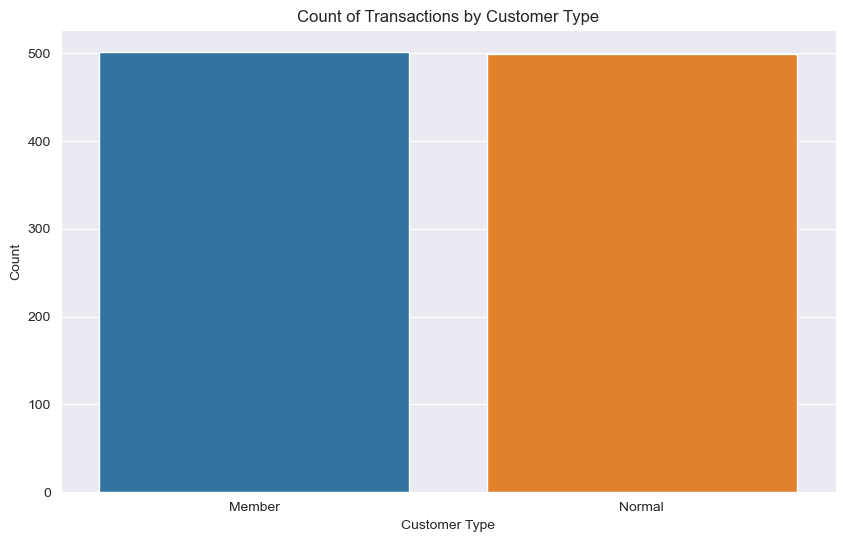

In [33]:
# Count plot for "Customer type"
sns.countplot(x='Customer type', data=df)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Count of Transactions by Customer Type')

print(df['Customer type'].value_counts())

plt.show()

Female    501
Male      499
Name: Gender, dtype: int64


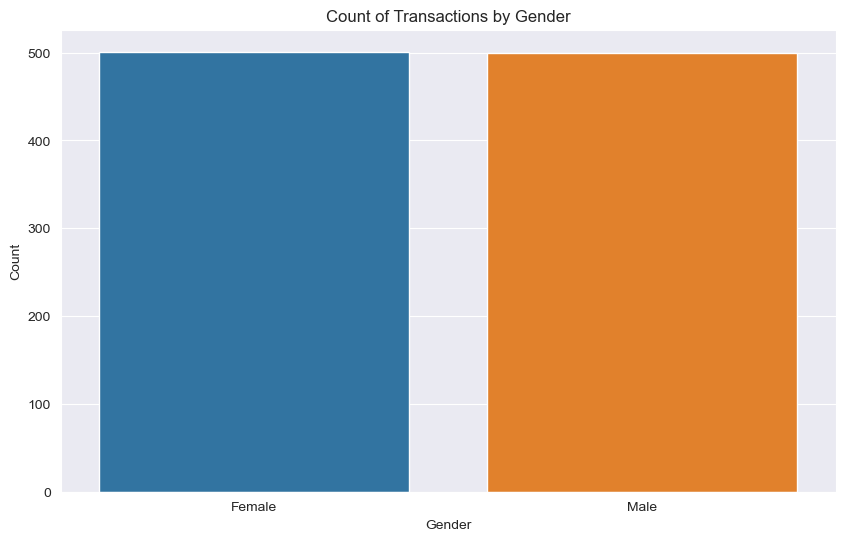

In [34]:
# Count plot for "Gender"
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Transactions by Gender')

print(df['Gender'].value_counts())

plt.show()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


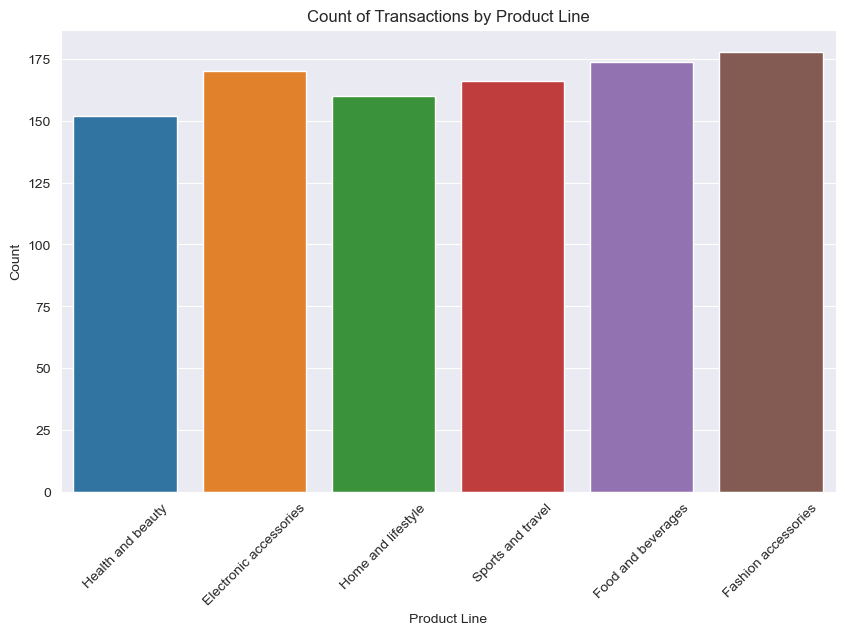

In [35]:
# Count plot for "Product line"
sns.countplot(x='Product line', data=df)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Count of Transactions by Product Line')
plt.xticks(rotation=45)

print(df['Product line'].value_counts())


plt.show()

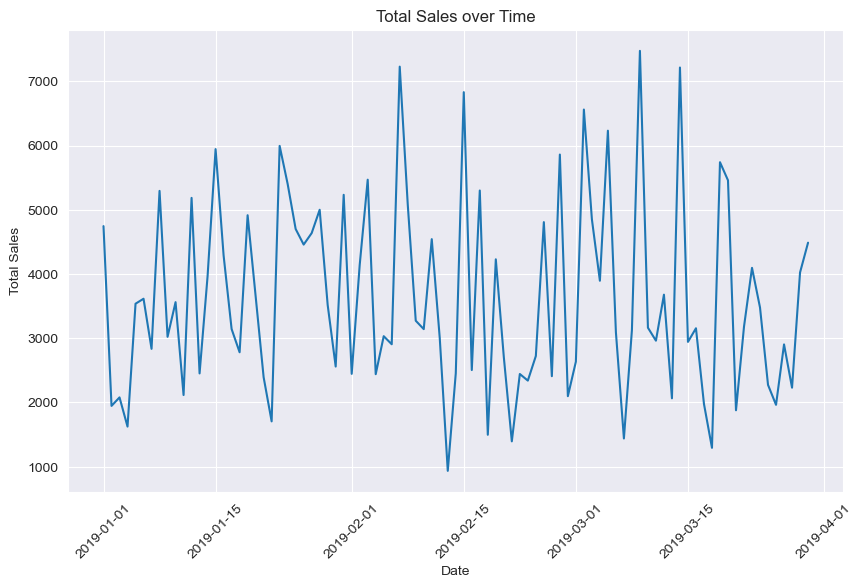

In [36]:
# Plot Date vs. Total
sns.lineplot(x='Date', y='Total', data=df, estimator=sum, errorbar=None)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales over Time')
plt.xticks(rotation=45)
plt.show()

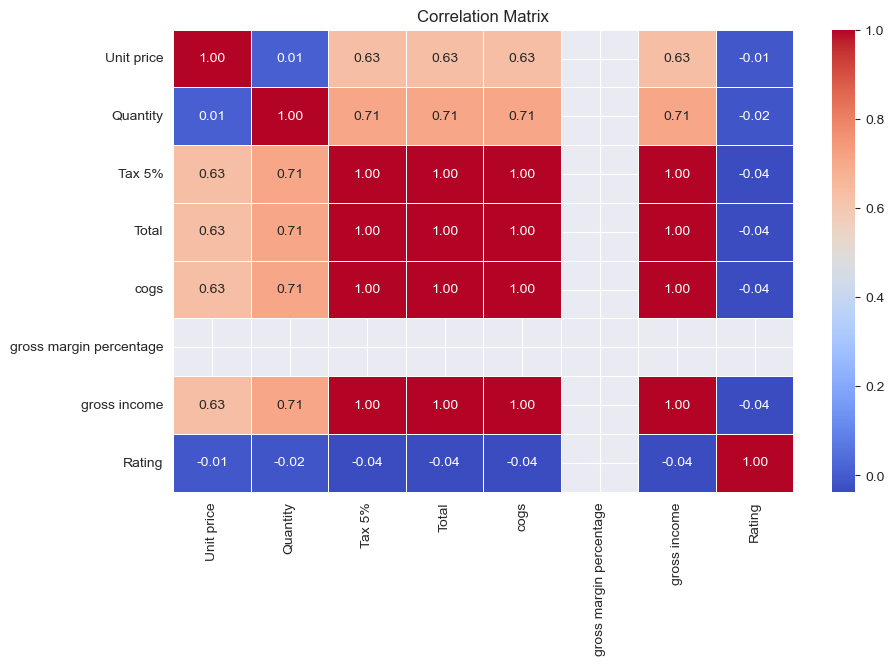

In [37]:
# Calculate the correlation matrix.
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Machine Learning

In [38]:
# Requre libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Feature selection: Let's use "Unit price", "Quantity", and "Tax 5%" as input features (X)
X = df[['Unit price', 'Quantity', 'Tax 5%']]

# Target variable: "Total" sales as the output (y)
y = df['Total']

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict using the test set
y_pred = model.predict(X_test)


In [43]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 6.553982618321001e-27
R-squared Score: 1.0


+ The model appears to be well-suited for the given dataset, and it can be considered a strong predictor for future sales based on the provided features.

In [44]:
model.intercept_

-2.8421709430404007e-13

In [45]:
# Model Coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients

Unit price    3.001719e-15
Quantity      4.263256e-14
Tax 5%        2.100000e+01
dtype: float64

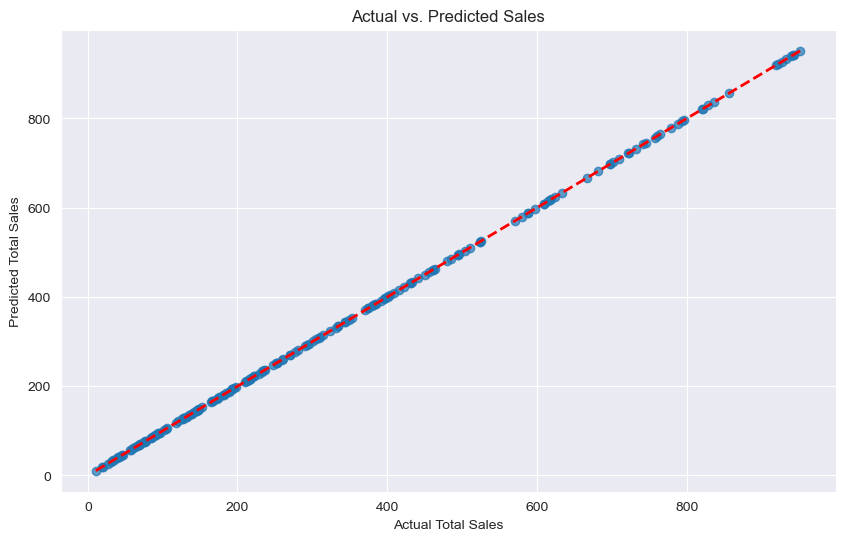

In [46]:
# Plot the actual vs. predicted "Total" sales
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

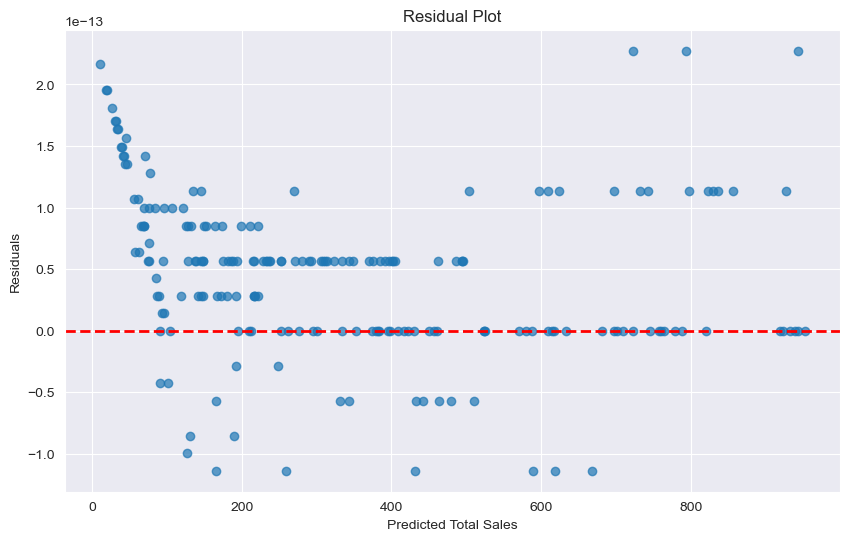

In [47]:
# Calculate the residuals (errors)
residuals = y_test - y_pred

# Plot the residual plot
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Total Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [48]:
# Predicted Sales values
y_pred

array([523.971 , 616.98  , 408.7335, 135.3555,  45.927 , 618.975 ,
       127.827 , 731.6925, 450.1035, 138.1275, 422.73  , 463.428 ,
       212.7825, 252.252 , 290.0835, 331.128 , 587.664 , 216.846 ,
       757.365 , 185.094 , 416.178 , 166.236 , 128.016 , 125.706 ,
       247.8735, 195.594 , 742.2975,  30.996 , 145.5825,  56.469 ,
        75.5475, 609.    ,  96.1905, 432.768 , 193.011 , 174.3   ,
       667.38  , 198.639 , 193.074 , 192.843 , 214.746 , 922.635 ,
        74.7075, 180.873 ,  93.0405, 400.764 , 221.886 ,  68.2395,
       343.224 , 281.169 , 430.71  , 101.64  ,  69.09  , 269.934 ,
       181.44  , 494.1825, 461.5275,  60.816 , 456.288 , 222.138 ,
       121.128 ,  33.936 ,  84.756 , 942.4485, 381.3915, 510.615 ,
       370.125 , 760.452 , 939.54  , 118.251 , 391.419 , 127.26  ,
       293.139 ,  89.0715,  65.604 , 697.368 , 764.19  , 253.008 ,
        76.755 , 745.836 , 305.55  ,  70.287 , 352.5795, 614.943 ,
       218.0745, 270.585 ,  69.111 , 829.08  , 384.72  , 395.8